### Analysis of networks generated from the Bianconi-Barabasi model

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import model


#### General parameters

In [27]:
n = 50000 # Number of nodes
m = 2 # Number of links for new nodes
m0 = 3 # Initial number of nodes

#### Network generated with a delta fitness distribution (BA model)

In [28]:
# Initialization
network_delta = model.network(m0, m)
network_delta.set_fitness_distr('delta')

In [29]:
# Generate the network
network_delta.generate_network(n)

# Get the degree distribution of the network
p_k_delta, k_delta = network_delta.get_degree_distr()

In [61]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_delta = np.delete(k_delta, np.argwhere(p_k_delta==0))
y_delta = np.delete(p_k_delta, np.argwhere(p_k_delta==0))
# Transform to log scale
x_log_delta = np.log10(x_delta)
y_log_delta = np.log10(y_delta)

# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(x_log_delta, y_log_delta)

# Regression line
y_fit_delta = 10**intercept_delta * x_delta**(slope_delta)
y_analytic_delta = x_delta**(-3)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 2.918


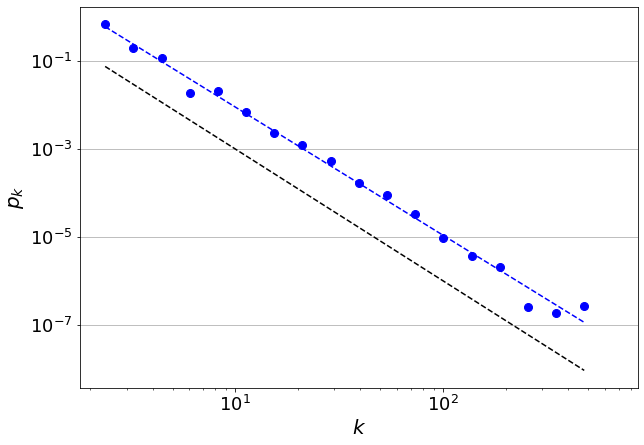

In [62]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_delta, p_k_delta, 'bo', markersize=8)
plt.loglog(x_delta, y_fit_delta, color = 'blue', linestyle = 'dashed')
plt.loglog(x_delta, y_analytic_delta, color = 'black', linestyle = 'dashed')

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

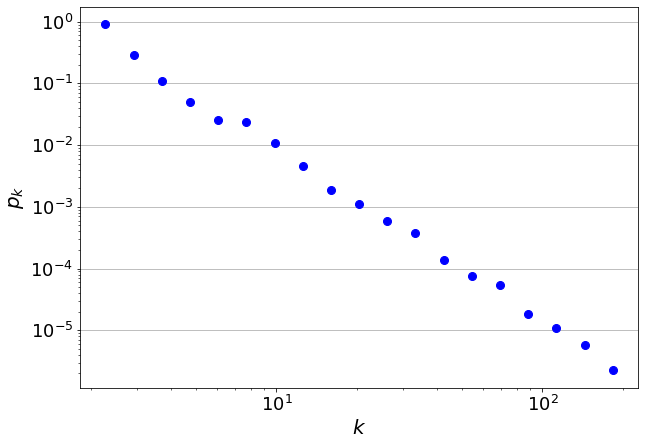

In [20]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_delta, p_k_delta, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()


#### Network generated with a uniform fitness distribution

In [31]:
# Initialization
network_uniform = model.network(m0, m)
network_uniform.set_fitness_distr('uniform')

In [32]:
# Generate the network
network_uniform.generate_network(n)

# Get the degree distribution of the network
p_k_uniform, k_uniform = network_uniform.get_degree_distr()

In [83]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_uniform = np.delete(k_uniform, np.argwhere(p_k_uniform==0))
y_uniform = np.delete(p_k_uniform, np.argwhere(p_k_uniform==0))
# Transform to log scale
x_log_uniform = np.log10(x_uniform)
y_log_uniform = np.log10(y_uniform * x_log_uniform)

# Linear regression (slope is the exponent)
slope_uniform, intercept_uniform, r_value_uniform, _, _ = linregress(x_log_uniform, y_log_uniform)

# Regression line
y_fit_uniform = 10**intercept_uniform * (x_uniform**(slope_uniform) / x_log_uniform)
y_analytic_uniform = 10**-1 * x_uniform**(-2.255)

print('The power law exponent of the degree distribution using a uniform fitness distribution is %s'% np.round(-slope_uniform, 3))

The power law exponent of the degree distribution using a uniform fitness distribution is 2.223


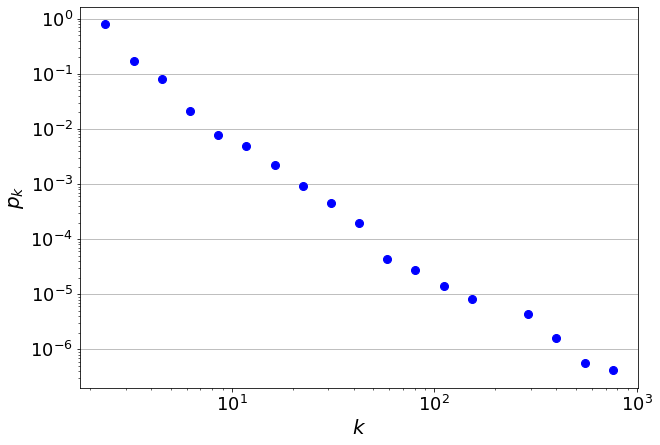

In [23]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_uniform, p_k_uniform, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Comparison of degree distribution

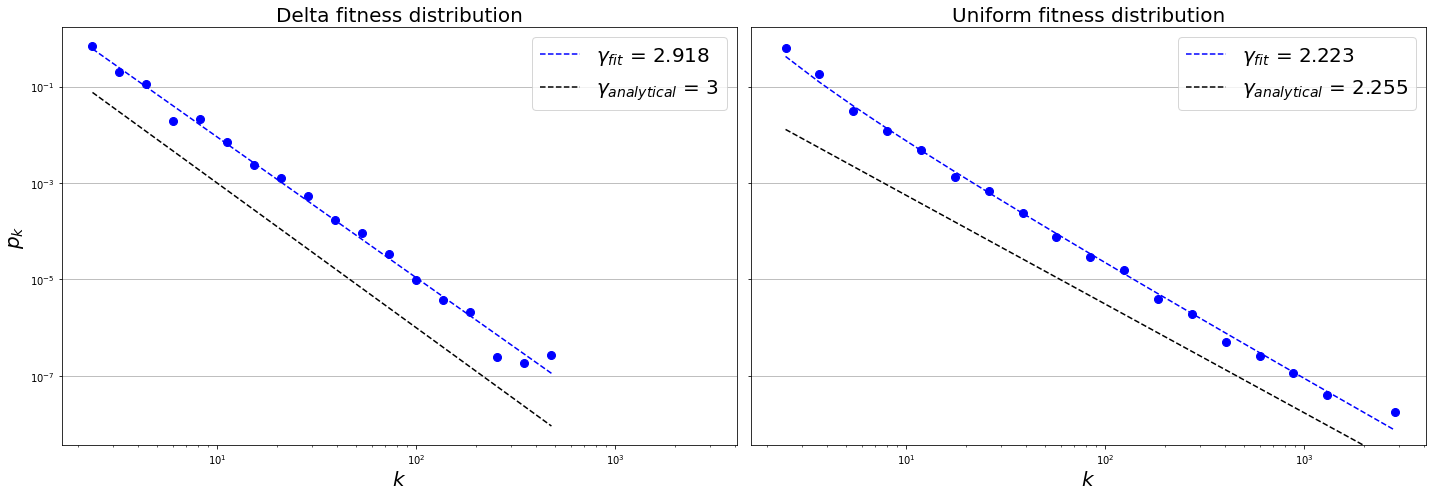

In [84]:
fig, axs = plt.subplots(1,2, figsize = (20,7), sharex=True, sharey=True)

axs[0].set_title('Delta fitness distribution', fontsize=20)
axs[0].loglog(k_delta, p_k_delta, 'bo', markersize=8)
axs[0].loglog(x_delta, y_fit_delta, color = 'blue', linestyle = 'dashed', label = '$\gamma_{fit}$ = %s'%np.round(-slope_delta,3))
axs[0].loglog(x_delta, y_analytic_delta, color = 'black', linestyle = 'dashed', label = '$\gamma_{analytical}$ = 3')
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)
axs[0].legend(fontsize = 20)

axs[1].set_title('Uniform fitness distribution', fontsize=20)
axs[1].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[1].loglog(x_uniform, y_fit_uniform, color = 'blue', linestyle = 'dashed', label = '$\gamma_{fit}$ = %s'%np.round(-slope_uniform,3))
axs[1].loglog(x_uniform, y_analytic_uniform, color = 'black', linestyle = 'dashed', label = '$\gamma_{analytical}$ = 2.255')
axs[1].set_xlabel('$k$', fontsize=20)
axs[1].legend(fontsize = 20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()